In [1]:
import pandas as pd
df = pd.read_csv("bank-stocks-merged.txt", sep='\t', error_bad_lines=False)

In [2]:
print list(df)

['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']


In [3]:
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,1/2/1975,ABAN2,5.0000,5.2500,4.7500,5.0000,0.0
1,1/3/1975,ABAN2,5.0000,5.2500,4.7500,5.0000,0.0
2,1/6/1975,ABAN2,5.0000,5.2500,4.7500,5.0000,0.0
3,1/7/1975,ABAN2,5.0000,5.3125,4.8125,5.0625,0.0
4,1/8/1975,ABAN2,5.0625,5.3750,4.8750,5.1250,0.0


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,595509.000000,595509.000000,595509.000000,595509.000000,5.955090e+05
mean,52.437470,56.395352,52.222895,52.447311,3.328747e+03
std,335.071010,534.842218,334.763017,335.057378,8.777564e+04
min,0.010000,0.010000,0.010000,0.010000,0.000000e+00
25%,6.887594,7.000000,6.750000,6.889000,0.000000e+00
50%,13.870000,14.000000,13.700000,13.875000,1.600000e+01
75%,23.940000,24.140000,23.731257,23.950000,1.798524e+02
max,7500.000000,50000.000000,7500.000000,7500.000000,1.226600e+07


Question 1: Describe the data (e.g., how many banks are in sample? how many banks have data that go back to 1975? how many banks appear in the sample after 2000? Etc.)

In [5]:
original = df['Ticker'].value_counts()   


print len(original),'banks are in the sample'


257 banks are in the sample


In [6]:
df["Date"] = pd.to_datetime(df["Date"],format = "%m/%d/%Y") 
df.dtypes

Date      datetime64[ns]
Ticker            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [7]:
df_sort=df.sort_values(by='Date')
df_sort.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,1975-01-02,ABAN2,5.000000,5.250000,4.750000,5.000000,0.0
188340,1975-01-02,BDET1,20.000000,23.750000,18.750000,21.250000,0.0
351072,1975-01-02,CAPB1,0.444444,0.444444,0.444444,0.444444,0.0
557417,1975-01-02,CTBC1,11.388889,11.666667,11.333333,11.500000,0.0
247053,1975-01-02,BOKC1,8.500000,9.000000,8.000000,8.500000,0.0


In [8]:
D1975=df.loc[df['Date']<'1976-01-01']
D1975.tail()

,Date,Ticker,Open,High,Low,Close,Volume
557665,1975-12-24,CTBC1,14.055556,14.222222,13.888889,14.055556,0.0
557666,1975-12-26,CTBC1,14.055556,14.222222,13.888889,14.055556,0.0
557667,1975-12-29,CTBC1,14.055556,14.333333,14.000000,14.166667,0.0
557668,1975-12-30,CTBC1,14.277778,14.611111,14.277778,14.444444,0.0
557669,1975-12-31,CTBC1,14.444444,14.777778,14.444444,14.611111,0.0


In [9]:
profile_1975 = D1975['Ticker'].value_counts()

print len(profile_1975),'banks have data that go back to 1975'


24 banks have data that go back to 1975


In [10]:
D2000=df.loc[df['Date']>'1999-12-31']
D2000.head()

,Date,Ticker,Open,High,Low,Close,Volume
4170,2000-01-03,ABCB,8.862454,8.913097,8.406671,8.710527,584.981849
4171,2000-01-04,ABCB,8.507956,8.609241,8.507956,8.609241,72.814196
4172,2000-01-05,ABCB,8.507956,8.609241,8.507956,8.609241,86.389725
4173,2000-01-06,ABCB,8.659884,8.913097,8.609241,8.609241,16.043806
4174,2000-01-07,ABCB,8.811812,8.913097,8.609241,8.710527,130.818726


In [11]:
profile_2000 = D2000['Ticker'].value_counts()

print len(profile_2000),'banks have data that is after 2000'

190 banks have data that is after 2000


Question 2:

Filter the sample to observations that record daily data from 2000-2017
Calculate the average daily difference between closing and opening prices. (Hint: compute the difference between the closing and opening prices for each bank, then take the average for that day).
Plot the outcomes. Provide a brief discussion about what you see

In [15]:
D2000['diff']=D2000['Close']-D2000['Open']
D2000.head()



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Ticker,Open,High,Low,Close,Volume,diff
4170,2000-01-03,ABCB,8.862454,8.913097,8.406671,8.710527,584.981849,-0.151928
4171,2000-01-04,ABCB,8.507956,8.609241,8.507956,8.609241,72.814196,0.101285
4172,2000-01-05,ABCB,8.507956,8.609241,8.507956,8.609241,86.389725,0.101285
4173,2000-01-06,ABCB,8.659884,8.913097,8.609241,8.609241,16.043806,-0.050643
4174,2000-01-07,ABCB,8.811812,8.913097,8.609241,8.710527,130.818726,-0.101285


In [36]:
df_group = D2000.groupby(["Date"]).mean()
df_group.head()

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2000-01-03,16.444438,16.631901,16.119347,16.291879,261.116954,-0.152559
2000-01-04,16.228953,16.420321,15.872725,16.019560,324.427140,-0.209393
2000-01-05,24.241264,24.441398,24.055904,24.246860,331.804837,0.005597
2000-01-06,45.607800,46.499396,45.433375,46.276104,305.821720,0.668304
2000-01-07,46.176625,46.471184,46.049463,46.241788,284.781132,0.065163


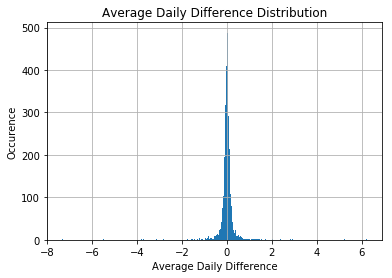

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



df_group['diff'].hist(bins=500)
plt.title("Average Daily Difference Distribution")
plt.xlabel("Average Daily Difference")
plt.ylabel("Occurence")
plt.show()


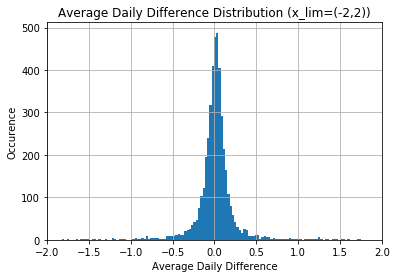

The average daily difference of closing and opening prices is normally distributd, and the meadian is approximately 0 


In [38]:
df_group['diff'].hist(bins=500)
plt.title("Average Daily Difference Distribution (x_lim=(-2,2))")
plt.xlabel("Average Daily Difference")
plt.ylabel("Occurence")
plt.xlim(-2, 2)
plt.show()

print "The average daily difference of closing and opening prices is normally distributd, and the meadian is approximately 0 "

In [39]:
df_groupp = df_group['diff']
df_groupp.head()

Date
2000-01-03   -0.152559
2000-01-04   -0.209393
2000-01-05    0.005597
2000-01-06    0.668304
2000-01-07    0.065163
Name: diff, dtype: float64

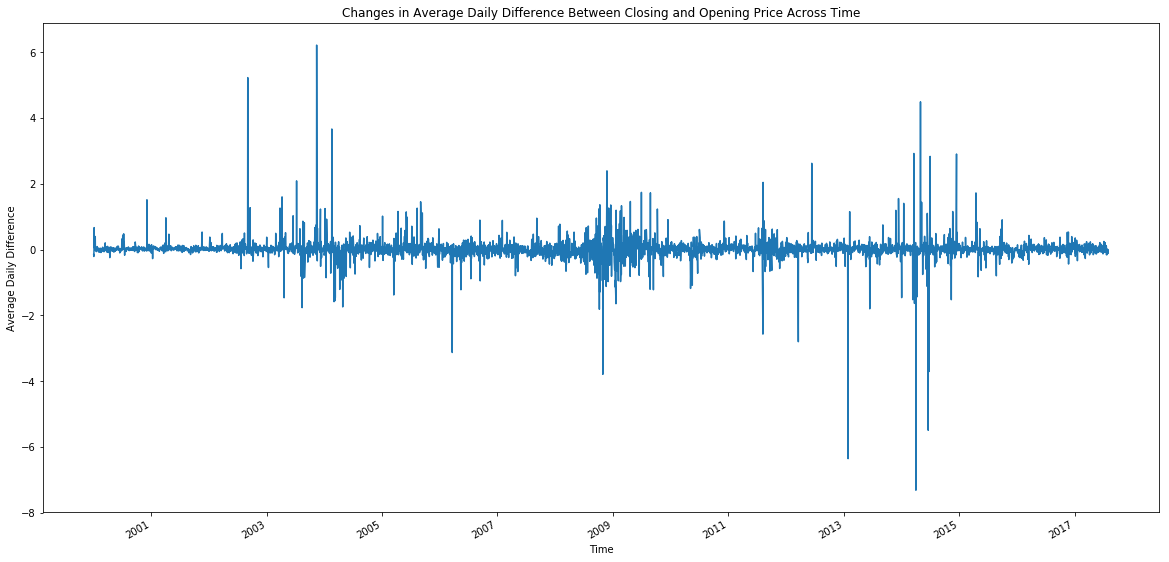

The average daily price difference overtime is approximatly 0, and it can be observed that during some time periods the price is more volatile than others


In [56]:

line_graph = df_groupp.plot(kind="Line", figsize = (20,10))
plt.title("Changes in Average Daily Difference Between Closing and Opening Price Across Time")
plt.xlabel("Time")
plt.ylabel("Average Daily Difference")
plt.show()

print "The average daily price difference overtime is approximatly 0, and it can be observed that during some time periods\
 the price is more volatile than others."


Question 3: Suppose you are interested in the average daily price variation from 1975-2017
to understand volatility over time. Calculate the average daily price variation
and plot the outcomes. (Hint: compute the difference between the high and
low prices and divide that number by the closing price for each bank). Provide
a brief discussion about what you see.

In [90]:
df_var=df
df_var['Variation(%)'] = (df_var['High']-df_var['Low'])*100/df_var['Close']
df_var.head()

,Date,Ticker,Open,High,Low,Close,Volume,variation,Variation,Variation(%)
0,1975-01-02,ABAN2,5.0000,5.2500,4.7500,5.0000,0.0,0.100000,10.000000,10.000000
1,1975-01-03,ABAN2,5.0000,5.2500,4.7500,5.0000,0.0,0.100000,10.000000,10.000000
2,1975-01-06,ABAN2,5.0000,5.2500,4.7500,5.0000,0.0,0.100000,10.000000,10.000000
3,1975-01-07,ABAN2,5.0000,5.3125,4.8125,5.0625,0.0,0.098765,9.876543,9.876543
4,1975-01-08,ABAN2,5.0625,5.3750,4.8750,5.1250,0.0,0.097561,9.756098,9.756098


In [91]:
df_vargp=df_var.groupby(['Date'] ).mean()
df_vargp.head()

,Open,High,Low,Close,Volume,variation,Variation,Variation(%)
Date,,,,,,,,
1975-01-02,6.824310,7.266536,6.581548,6.930121,0.702800,0.103455,10.345463,10.345463
1975-01-03,6.952755,7.334600,6.649612,6.998186,2.065400,0.098937,9.893750,9.893750
1975-01-06,6.393994,6.708809,6.106049,6.415433,1.917913,0.088402,8.840166,8.840166
1975-01-07,6.427511,6.844794,6.225878,6.551418,2.531478,0.091766,9.176624,9.176624
1975-01-08,6.559470,6.939761,6.326132,6.640951,4.699304,0.090392,9.039192,9.039192


In [92]:
df_vargpp=df_vargp['Variation']
df_vargpp.head()

Date
1975-01-02    10.345463
1975-01-03     9.893750
1975-01-06     8.840166
1975-01-07     9.176624
1975-01-08     9.039192
Name: Variation, dtype: float64

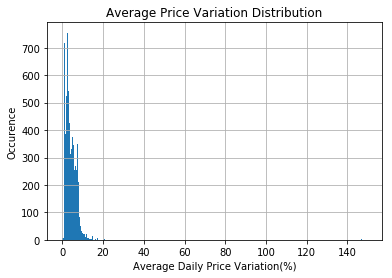

In [96]:
df_vargpp.hist(bins=500)
plt.title("Average Price Variation Distribution")
plt.xlabel("Average Daily Price Variation(%)")
plt.ylabel("Occurence")
plt.show()

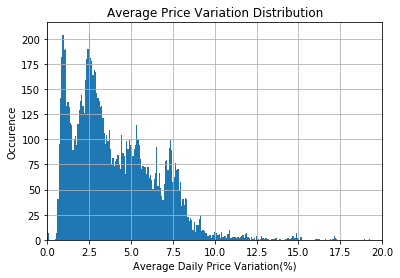

The average daily variation distribution displays positive skewness in that the mean is greater than the meadian and the mode. For most days, the price variation is less than 10%. It is more common for smaller price variation than larger ones, thus the market is relatively stable for most cases.


In [99]:
df_vargpp.hist(bins=2000)
plt.title("Average Price Variation Distribution")
plt.xlabel("Average Daily Price Variation(%)")
plt.ylabel("Occurence")
plt.xlim(0, 20)
plt.show()

print"The average daily variation distribution displays positive skewness in that the mean is greater than the meadian and the mode\
. For most days, the price variation is less than 10%. It is more common for smaller price variation than larger ones, thus the market is relatively stable for most cases."

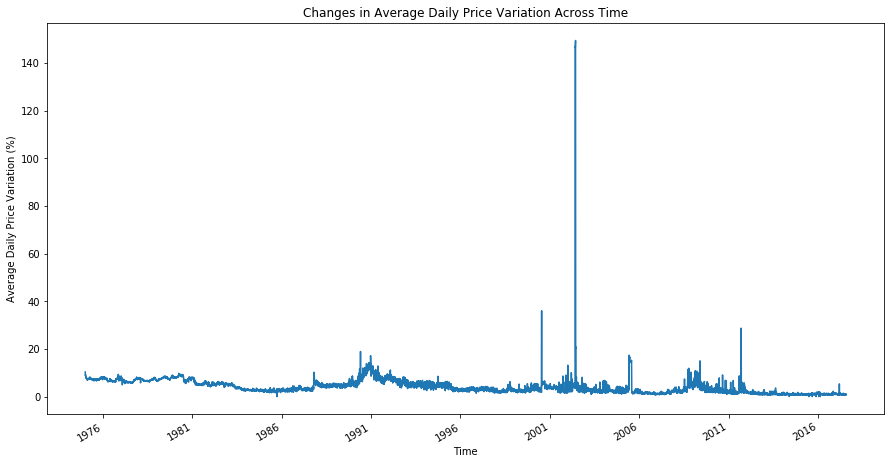

The daily price variation is relatively small for most cases, and the market is mostly stable except for short periods of instability.


In [103]:
line_graph = df_vargpp.plot(kind="Line", figsize = (15,8))
plt.title("Changes in Average Daily Price Variation Across Time")
plt.xlabel("Time")
plt.ylabel("Average Daily Price Variation (%)")
plt.show()

print "The daily price variation is relatively small for most cases, and the market is mostly stable except for short \
periods of instability."